<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c1/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción.

En este apartado vamos a ver cómo poder aplicar el algoritmo KNN para un problema de clasificación de especies de flores. Para ello vamos a emplear un dataset muy utilizado denominado iris. Este dataset es tan conocido que ya viene por defecto en la instalación de `scikit-learn`. Veamos cómo cargar este conjunto de datos. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
# importamos el dataset
iris = datasets.load_iris()
#Descripción de los datos
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Los datos del dataset iris vienen originalmente en formato [diccionario](https://docs.python.org/3/tutorial/datastructures.html#dictionaries/). Para aceder a cada tipo de información acerca de los datos es necesario indicar la clave corresponiente. Veamos cuales son las posibles opciones.

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Los datos de las features o atributos de cada una de las observaciones son accesibles mediante la clave **'data'**. Para saber el nombre de cada uno de los atributos usamos la clave **'feature_names'**.

In [4]:
print("Los atributos del iris dataset son: ",iris['feature_names'])
print("\nLas features están almacenadas en formato: ", type(iris['data']))
print("Una muestra de los valores que toman las features:\n")
print(iris['data'][:10])

Los atributos del iris dataset son:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Las features están almacenadas en formato:  <class 'numpy.ndarray'>
Una muestra de los valores que toman las features:

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


Hay tres tipo de flores a clasificar (variable target): 
*   Setosa
*   Versicolor
*   Virginica
    
Esta información es accesible mediante la clave **target_names**. En cambio, en **target** estos valores se almacenan de forma numérica, puesto que es un formato muy útil para la mayoría de algoritmos de Machine Learning.

In [5]:
print(iris['target_names'])
np.unique(iris.target)

['setosa' 'versicolor' 'virginica']


array([0, 1, 2])

#Transformación a Pandas DataFrame

Vamos a modificar el formato original de los datos a un formato muy empleado en todos los desarrollos de Python: [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).


*   *np.c_*: es la función de  numpy que permite concatenar los datos
*   *columns*: definimos el nombre  de las columnas



In [6]:
# Modificamos los datos para crear con ellos un datset
    # np.c_: es la función de  numpy que permite concatenar los datos
    # columns: definimos el nombre de las columnas
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Dado que ahora tenemos los datos en formato dataframe, podemos estudiarlos más sencillamente, gracias a las funciones que este formato aporta. Por ejemplo, si queremos hacer un estudio general emplearemos el método [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html):

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#Preprocesamiento de los datos

Vamos a separar los datos de las variables independientes (atributos) de los de la variable dependiente (label ó target). Para ello empleamos el método [`iloc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

In [8]:
X= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

Dividimos los datos en dos subconjuntos:

*   Entrenamiento (train)
*   Evaluación (test)

Esta es una práctica muy común en Machine Learning, y extremadamente recomendada, puesto que nos permite entrenar el algoritmo con un conjunto de datos (train) y evaluar el rendimiento del mismo sobre otro conjunto diferente (test). 


De forma que, si vemos que el algoritmo tiene unos resultados mucho mejores para el conjunto de entrenamiento que para el de evaluación, podría ser un indicador de sobreajuste (overfitting), es decir, el algoritmo podría estar memorizando los datos de entrenamiento en lugar de generalizar.

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
# Elegimos el 20% de los datos para test
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, 
                                                   random_state= 0)

#Transformamos los datos a formato numpy array, puesto que es el formato requerido por la implementación de KNN de sckit-learn
X_train= np.asarray(X_train) 
y_train= np.asarray(y_train)

X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

In [11]:
print(f'Tamaño datos entrenamiento: {X_train.shape[0]} muestras \nTamaño datos test: {X_test.shape[0]} muestras')

Tamaño datos entrenamiento: 120 muestras 
Tamaño datos test: 30 muestras


Ahora procedemos a normalizar los datos. Conviene hacer esto antes de proceder a su análisis, para garantizar que todos los atributos están en la misma escala y que el algorimto no dé mayor peso a los atributos con valores más elevados. 

Este hecho es especialmente importante en algoritmos como el de KNN, puesto que se basa en medir la distancia ente observaciones, siendo las más cercanas de la misma clase y las más lejanas de otras diferentes. Es por ello que, si un atributo está en una escala mucho mayor a las demás, el algoritmo va a considerar las observaciones mucho más alejadas de lo que están en realidad. 

In [12]:
from sklearn.preprocessing import Normalizer

In [13]:
scaler= Normalizer().fit(X_train) 
normalized_X_train= scaler.transform(X_train) # Aplicamos el escalado a datos de entrenamiento
normalized_X_test= scaler.transform(X_test) # Aplicamos el escalado a datos de test

Visualizamos los datos antes y después de la normalización

Text(0.5, 1.08, 'Pair Plot del conjunto de datos dspués de la normalzación')

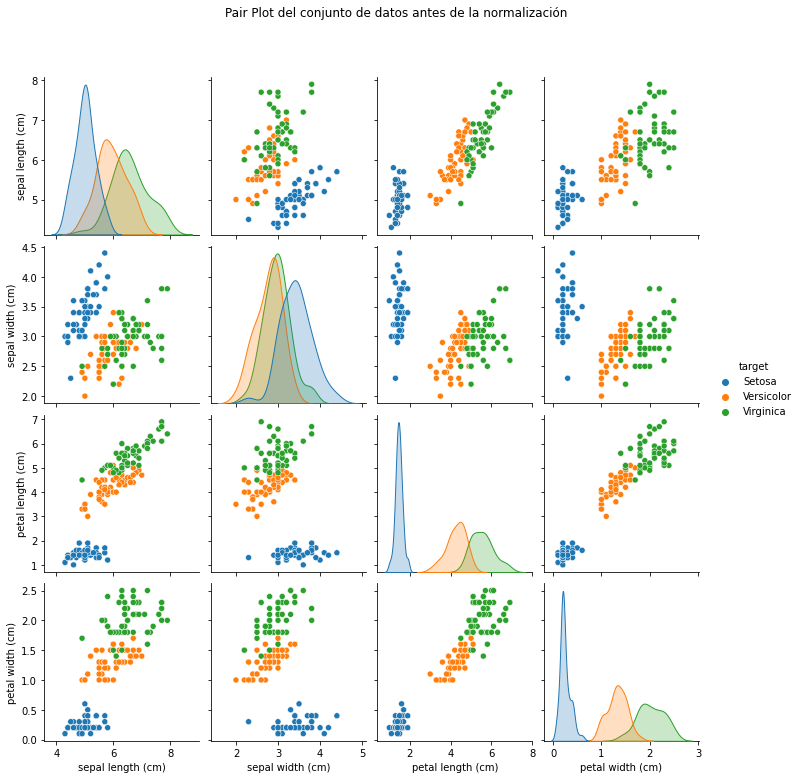

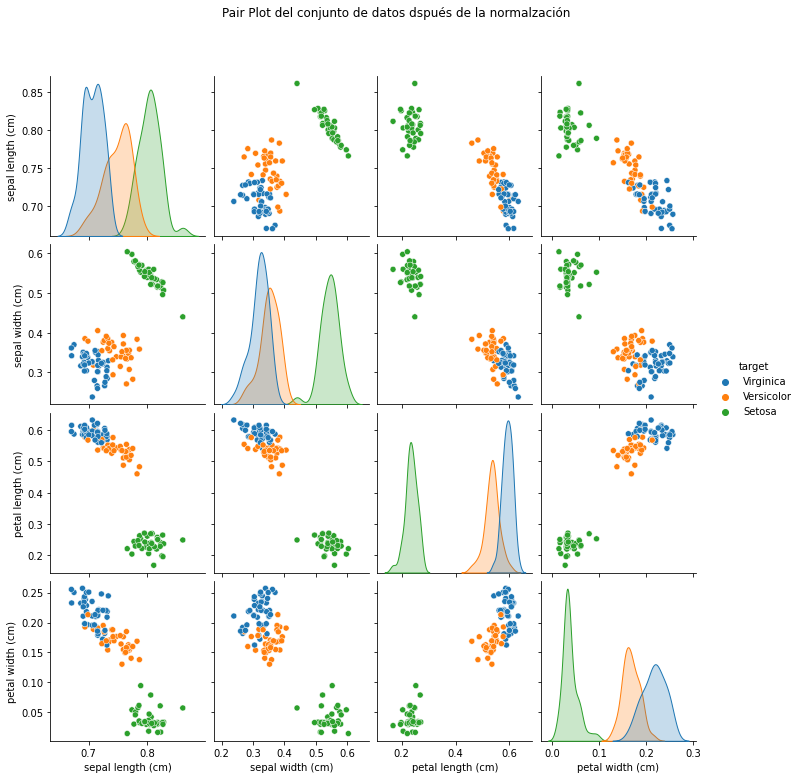

In [17]:
## Antes normalización
# Definimos el significado de los códigos de las categorías
# Lo hacemos mediante el siguiente diccionario
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} 
antes= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
antes.fig.suptitle('Pair Plot del conjunto de datos antes de la normalización', y=1.08)

## Después normalización
iris_df_2= pd.DataFrame(data= np.c_[normalized_X_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
despues= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
despues.fig.suptitle('Pair Plot del conjunto de datos dspués de la normalzación', y=1.08)

Para poder visualizar mejor los cambios en la relación entre las variables debidos a la normalización vamos a representar ambos gráficos a la misma altura.

NOTA: En este caso ha sido necesario almacenar los gráficos como imágenes .png, dado que el método *pairplot()* de seaborn no admite el parámetro *ax* para poder hacerlo sin necesidad de almacenar los gráficos en memoria.

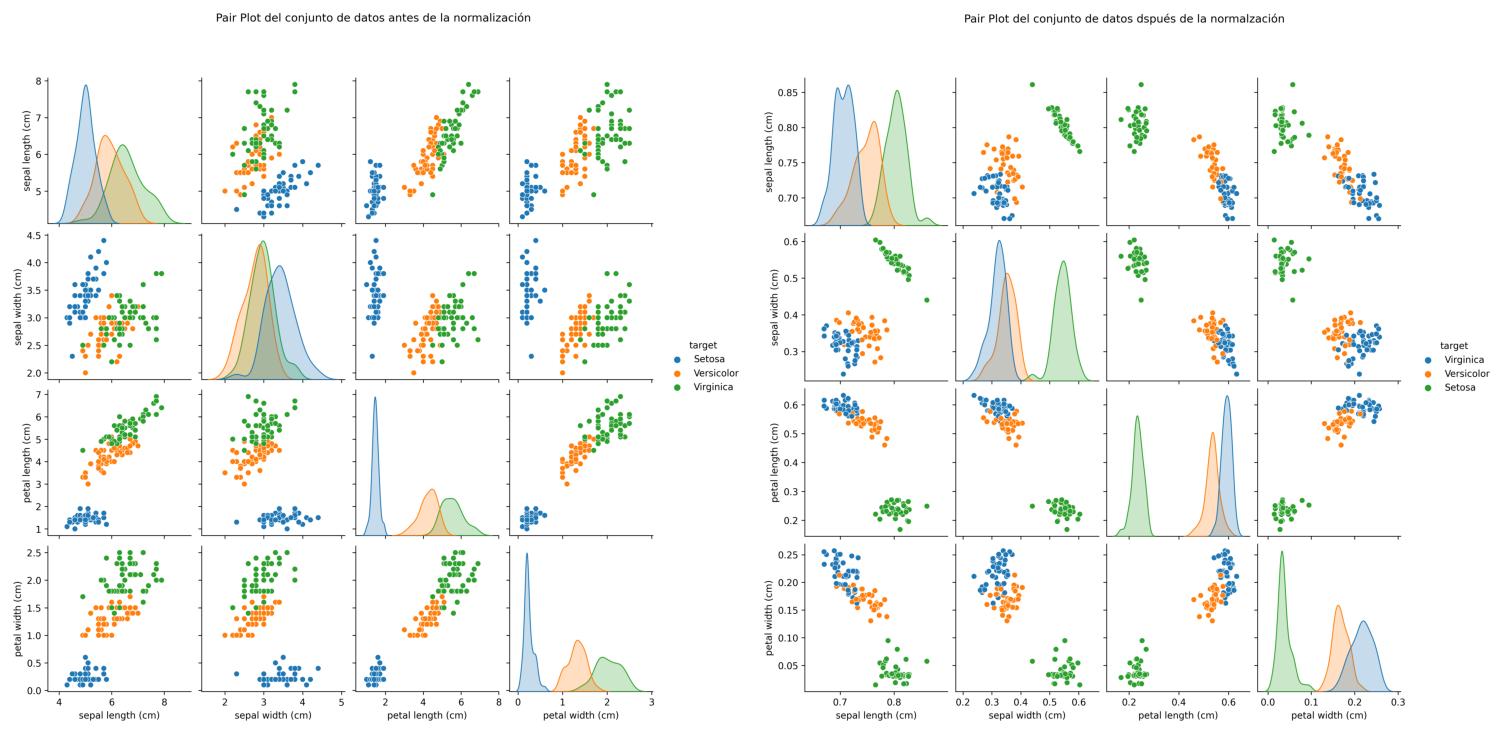

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


############### 1. Guardamos los plots anteriores en memoria temporalmente
antes.savefig('g0.png', dpi=300)
plt.close(antes.fig)

despues.savefig('g1.png', dpi=300)
plt.close(despues.fig)

############### 2. Pintamos los subplots en la misma fila a partir de las imagenes almacenadas
f, axarr = plt.subplots(1, 2, figsize=(21, 21))

axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

#Implementación del algoritmo KNN
Realizamos la clasificación mediante `scikit-learn`.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
K = 3 
knn=KNeighborsClassifier(n_neighbors= K)
knn.fit(normalized_X_train, y_train)
y_pred= knn.predict(normalized_X_test)
print(y_pred)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


Estudiemos la precisión (accuracy) del método

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred)}')

El accuracy obtenido es de 0.9666666666666667


Obtenemos la [matriz de confusión](https://docs.w3cub.com/scikit_learn/auto_examples/model_selection/plot_confusion_matrix)

In [22]:
from sklearn.metrics  import confusion_matrix

In [23]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

En numerosas ocasiones, cuando tenemos que realizar informes o presentaciones de resultados, necesitamos representar nuestras conclusiones en un formato más elegante y visualmente atractivo. Es por ello que os dejo la siguiente función para poder representar la matriz de confusión de una manera más visual.

In [24]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y representa la matriz de confusión
    Puede aplicarse la normalización de la matriz con el parámetro `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Categoría verdadera')
    plt.xlabel('Categoría predicha')
    plt.tight_layout()



Matriz de confusión sin normalización
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


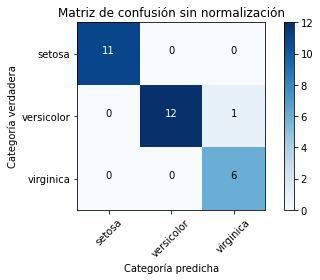

In [25]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,
                      title='Matriz de confusión sin normalización')

Si en lugar de verlo en términos absolutos preferimos en términos relativos, simplemente hay que especificar el parámetro `normalize=True`.

Matriz de confusión normalizada
[[1.         0.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]]


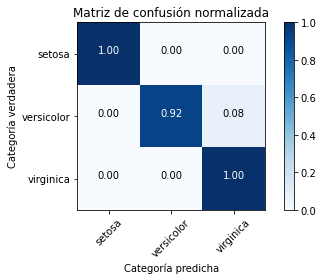

In [26]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names, normalize=True,
                      title='Matriz de confusión normalizada')

plt.show()

Para entender mejor la matriz de confusión, veamos los datos reales y los comparamos con los predichos por el algoritmo.

In [27]:
df_comp = pd.DataFrame({'real':y_test,'pred':y_pred,})
df_comp

,real,pred
0,2.0,2.0
1,1.0,1.0
2,0.0,0.0
3,2.0,2.0
4,0.0,0.0
5,2.0,2.0
6,0.0,0.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [28]:
#Creamos una columna para detectar los casos en los que se ha equivocado el algortimo
#   1 -> Predicción correcta
#   2 -> Predicción errónea
df_comp['diff'] = np.where((df_comp['real'] == df_comp['pred']), 1, 0)
 
# Imprimimos la observación en la que se equivoca el algoritmo
print(df_comp[df_comp['diff'] == 0])

    real  pred  diff
17   1.0   2.0     0


Hay 11 valores 0 que coinciden en el datos real y el predicho. Lo mismo se puede decir para el resto de los datos bien clasificados. Pero hay un dato que el algoritmo predice a 2 pero realmente es 1. Este caso lo podemos encontrar en la línea 17 de la salida anterior.

 # Ejercicio propuesto

Ahora os toca probar a vosotros. Os propongo estudiar cómo afecta al resultado la variación del parámetro k a la clasificación obtenida por el algoritmo KNN. Comentad los resultados en el foro.

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]
El accuracy obtenido es de 1.0
Matriz de confusión sin normalización
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


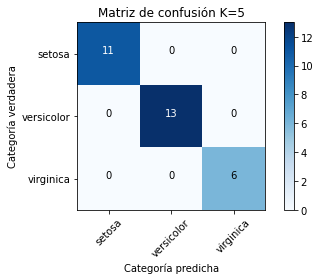

In [37]:
## K=5
# Entrenar
knn_k5=KNeighborsClassifier(n_neighbors= 5)
knn_k5.fit(normalized_X_train, y_train)
y_pred_k5= knn_k5.predict(normalized_X_test)
print(y_pred_k5)
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred_k5)}')

# Calcular matriz de confusión
cnf_matrix_k5 = confusion_matrix(y_test,y_pred_k5)
plt.figure()
plot_confusion_matrix(cnf_matrix_k5, classes=iris.target_names,
                      title='Matriz de confusión K=5')
plt.show()

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]
El accuracy obtenido es de 1.0
Matriz de confusión sin normalización
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


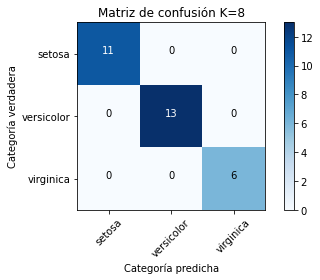

In [38]:
## K=8
# Entrenar
knn_k8=KNeighborsClassifier(n_neighbors= 8)
knn_k8.fit(normalized_X_train, y_train)
y_pred_k8= knn_k8.predict(normalized_X_test)
print(y_pred_k8)
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred_k8)}')

# Calcular matriz de confusión
cnf_matrix_k8 = confusion_matrix(y_test,y_pred_k8)
plt.figure()
plot_confusion_matrix(cnf_matrix_k8, classes=iris.target_names,
                      title='Matriz de confusión K=8')
plt.show()

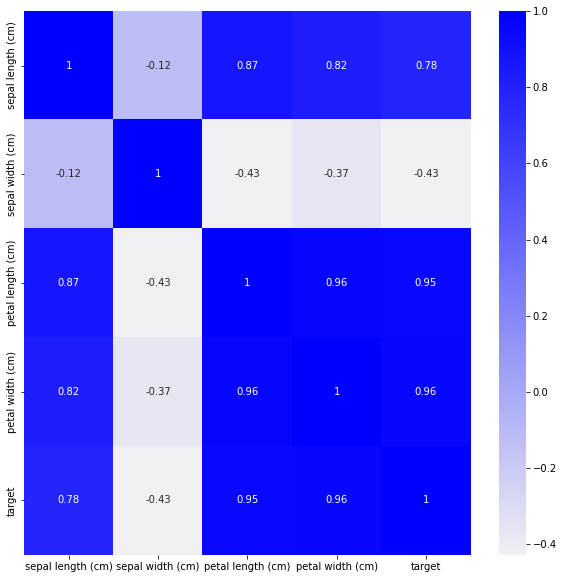

In [41]:
# ANÁLISIS DE CORRELACIONES

plt.figure(figsize=(10,10))
corr = iris_df.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()